
# Udacity Data Analyst Nanodegree Program
## Project 2. Investigate Gapminder World Health Data
project: Udacity Data Analyst Nanodegree EDA Project  
author: Andrew Nachtigal  

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This purpose of this project is to collect, clean, and explore data from the Gapminder Foundation regarding trends in income per capita and health indicators incuding life expectancy, child mortality rates, and the number of births per woman.

#### Gapminder Data

The Gapminder Foundation promotes sustainable global development and achievement of the United Nations Millennium Development Goals by increased use and understanding of statistics and other information about social, economic, and environmental development. Gapminder collects data  that describes how people live their lives in different countries, tracked across the years, and on a number of different indicators. 

This project uses data from Gapminder to compare GDP per person and three measures of health outcomes including life expectancy, child mortality rates, and the number of children born to each woman.

#### Questions Explored Through This Project
<ul>
<li><a href="#Q1">How have different regions of the world improved measures of health quality since 1800?</a></li>
<li><a href="#Q2">Are there trends between GDP and indicators of health outcomes? </a></li>
<li><a href="#Q3">How has the number of children born per woman changed since 1800?</a></li>
</ul>


## Data Description

This project compares GDP per person and three measures of health outcomes at the country level.

1. __Country and Geography Data__
    'Countries' refers to the 195 states recognized by the UN. Gapminder groups countries into four regions of the world
    including The Americas, Europe, Africa, and Asia.  
    https://www.gapminder.org/data/geo/
    
2. __Income per person (GDP/capita, PPP inflation-adjusted)__
    Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 
    prices, PPP based on 2011 ICP.)  
    http://gapm.io/dgdppc
    
3. __Life Expectancy (years)__
    The average number of years a newborn child would live if current mortality patterns were to stay the same.  
    http://gapm.io/ilex
    
4. __Child Mortality (0-5 year-olds dying per 1000 born)__
    Death of children under five years of age per 1,000 births.  
    http://gapm.io/du5mr
    
5. __Babies per woman (total fertility)__
    Total fertility rate - the number of children that would be born to each woman with prevailing age-specific fertility
    rates.  
    http://gapm.io/dtfr

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

## Load Data

In [2]:
# load indicator data as dataframes

# Geographic region by country
# GDP/capita, PPP$ inflation-adjusted (gdp)
# Life Expectancy Years (life)
# Child Mortality Rate (cmr)
# Babies per woman (bpw)

df_region = pd.read_excel('gapminder-data/DataGeographies-v1-byGapminder.xlsx', sheet_name=1)
#df_gdp = pd.read_csv('gapminder-data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
#df_life = pd.read_csv('gapminder-data/life_expectancy_years.csv')
#df_cmr = pd.read_csv('gapminder-data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
#df_bpw = pd.read_csv('gapminder-data/children_per_woman_total_fertility.csv')

# load data
df_gdp = pd.read_csv('gapminder-data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col='country')
df_life = pd.read_csv('gapminder-data/life_expectancy_years.csv', index_col='country')
df_cmr = pd.read_csv('gapminder-data/child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col='country')
df_bpw = pd.read_csv('gapminder-data/children_per_woman_total_fertility.csv', index_col='country')


## Visualize GDP per Capita Data via Sample Time Series
* Sample of 35 Countries
* Graph GDP/capita for all countries


In [3]:
df_gdp.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
Albania,667,667,667,667,667,668,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
Algeria,715,716,717,718,719,720,721,722,723,724,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
Angola,618,620,623,626,628,631,634,637,640,642,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


#### GDP per Capita has risen dramatically around the world since 1800.

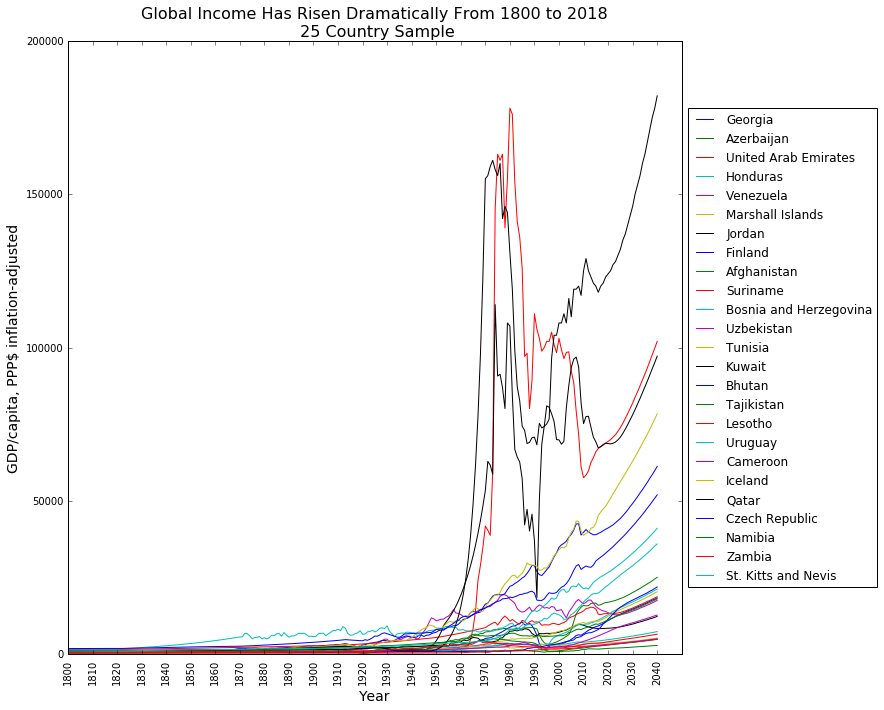

In [4]:
import matplotlib.ticker as ticker

# 'get current axis'
ax = plt.gca()

# Sample Income Per Person; 30 Countries, 1800 - 2018.
c_sample = df_gdp.sample(25)

# multiple column line plot
c_sample.transpose().plot(figsize=(11,11), legend=False, ax=ax)
plt.title('Global Income Has Risen Dramatically From 1800 to 2018\n 25 Country Sample', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('GDP/capita, PPP$ inflation-adjusted', size=14);
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5));

# select every 10th year for xlabels
x_list = list(df_gdp);
df_x_list = pd.DataFrame(x_list);
x_label = df_x_list.iloc[::10, :]
list(x_label[0])

# xaxis tick marks
x_loc = x_label.index.values;
xlabels = x_label[0];
plt.xticks(x_loc, xlabels, rotation=90, size=10);

# save as png
plt.savefig('plots/0-global-gdp.png', bbox_inches='tight')


<a id='wrangling'></a>
## Data Wrangling

### Inspect Data and Create Tidy DataSet

__Tidy Data__

The first step of a data analysis project is to inspect and transform the data into a single, tidy dataset which will be easy to work with. Tidy data is characterized by the following principles:

* Each variable must have its own column.  
* Each observation must have its own row.  
* Each value must have its own cell.  

Gapminder data is provided in wide format, which is common for data reporting. Long format data is more useful for analysis and comparability across indicators. Long format data separates the unit of analysis (country-year) into two separate variables. Wide data combines one of the keys (year) with the value variable (gdp, life expectancy, etc.).

To create a tidy data set for analyzing the Gapminder data, the following data manipulation steps are taken:

1. Create consistent list of countries
2. filter data to every other year for 1800:2018
3. Merge geographic region data
4. Melt/reshape data from wide to long format
5. Concatenate indicator dataframes
6. save clean dataset as csv for future use

### Inspect first few rows of each dataset

In [5]:
df_region.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,World bank income group 2017
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


In [6]:
df_gdp.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
Albania,667,667,667,667,667,668,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
Algeria,715,716,717,718,719,720,721,722,723,724,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
Angola,618,620,623,626,628,631,634,637,640,642,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [7]:
df_life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [8]:
df_cmr.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,NaN,NaN
Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.1,81.6


In [9]:
df_bpw.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


### Do datasets have symmetric dimensions?

In [10]:
data_frames = [df_gdp, df_life, df_cmr, df_bpw];

for data_frame in data_frames:
    print(data_frame.shape)

(193, 241)
(187, 219)
(193, 219)
(184, 219)


__Data is not symmetric.__

## Data Reshaping & Cleaning

### Clean geographic region dataset
* reshape
* drop unused columns

In [11]:
# drop unused columns in df_region dataframe
df_region.drop(['geo','eight_regions','six_regions','members_oecd_g77','Latitude','Longitude','UN member since','World bank region',
                 'World bank income group 2017'], axis=1, inplace=True)

In [12]:
# change column names
df_region.rename({'name':'country'}, axis=1, inplace=True)
df_region.rename({'four_regions':'region'}, axis=1, inplace=True)
df_region.set_index('country', drop=True, inplace=True)
df_region.head()

,region
country,
Afghanistan,asia
Albania,europe
Algeria,africa
Andorra,europe
Angola,africa


### Create dataset with common countries and date range for all indicator variables

The data covers different collections of countries. Generally, similar date ranges are represented. A common set of countries will need to be obtained.  This can be achieved through finding a common intersection set.

* inspect country data shape and labels (names)
* find intersection of 'country' Series for indicator variables
* filter dataframes using intersection set

In [14]:
# get country lists
def c_list(dataFrame):
    '''
    input: list of dataframes
    return: dataframe of countries
    '''
    countries = dataFrame.index.tolist()
    return countries

# dataframe list to iterate over
data_Frames = [df_gdp, df_life, df_cmr, df_bpw];
# tempList = []

# empty DataFrame to include in pd.concat()
common_df = pd.DataFrame()
for data_Frame in data_Frames:
    tempList = c_list(data_Frame)
    temp_df = pd.DataFrame(tempList)
    common_df = pd.concat([common_df, temp_df], axis=1)

# rename columns
common_df.columns = ['df_gdp','df_life','df_cmr','df_bpw']

In [15]:
# uneven lists of countries: some countries will need to be dropped
common_df.tail(10)

,df_gdp,df_life,df_cmr,df_bpw
183,United Kingdom,Vietnam,United Kingdom,Zimbabwe
184,United States,Yemen,United States,NaN
185,Uruguay,Zambia,Uruguay,NaN
186,Uzbekistan,Zimbabwe,Uzbekistan,NaN
187,Vanuatu,NaN,Vanuatu,NaN
188,Venezuela,NaN,Venezuela,NaN
189,Vietnam,NaN,Vietnam,NaN
190,Yemen,NaN,Yemen,NaN
191,Zambia,NaN,Zambia,NaN
192,Zimbabwe,NaN,Zimbabwe,NaN


In [16]:
# dataframe column names
list(common_df) 

['df_gdp', 'df_life', 'df_cmr', 'df_bpw']

In [17]:
# obtain set intersection of common countries
u = set.intersection(set(common_df['df_gdp']),set(common_df['df_life']),set(common_df['df_cmr']),set(common_df['df_bpw']))

### Filter Country Set

In [18]:
# filter function 
def country_filter(dataFrame):
    dataFrame = dataFrame[dataFrame.index.isin(u)]
    return dataFrame

# indicator dataframes to filter
data_Frames = [df_gdp, df_life, df_cmr, df_bpw];
filter_df_list = list()

for df in data_Frames:
    filter_df_list.append(country_filter(df))

### Test dataframes for same shape 
* Print dataframe shape attributes to see a tuple containing total rows and total columns
* Need to filter date range to common range.

In [19]:
# dataframes shapes -> same number of rows.
filter_df_list[0].shape, filter_df_list[1].shape, filter_df_list[2].shape, filter_df_list[3].shape

((184, 241), (184, 219), (184, 219), (184, 219))

In [20]:
filter_df_list;

### Filter Date Range
* Filter years to even years

In [21]:
# function to filter data range
def date_filter(dataFrame):
    '''
    input: list of dataframes
    return: date filtered list of dfs
    '''
    dataFrame = dataFrame.loc[:, '1800':'2018':2]
    return dataFrame

# input dataframe
date_filter_list = list()

# iterate over df to filter dates
for df in filter_df_list:
    date_filter_list.append(date_filter(df))


In [22]:
date_filter_list[0].head()

,1800,1802,1804,1806,1808,1810,1812,1814,1816,1818,...,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,604,604,604,604,604,...,972,1060,1060,1160,1300,1610,1840,1780,1740,1870
Albania,667,667,667,668,668,668,668,668,669,669,...,5470,6230,7020,7920,9150,9930,10400,10700,11400,12400
Algeria,715,717,719,721,723,725,727,729,731,733,...,10200,10800,11800,12300,12700,12900,13200,13500,14000,13700
Angola,618,623,628,634,640,645,651,657,662,668,...,3510,3180,3460,4600,5980,5900,6000,6260,6030,5850
Antigua and Barbuda,757,757,757,757,758,758,758,758,759,759,...,18800,17500,19200,22500,24000,19100,19100,19500,20800,21000


### Merge geographic region labels with country labels

* inner join only retains rows in which both tables share a key value

In [23]:
# filter data range
def region_merge(dataFrame):
    '''
    input: list of dataframes
    return: date filtered list of dfs
    '''
    dataFrame = dataFrame.merge(right=df_region, how='inner', left_index=True, right_index=True)
    return dataFrame

# input dataframe
region_dfs = list()

# iterate over df to filter dates
for df in date_filter_list:
    region_dfs.append(region_merge(df))
    
    

In [24]:
region_dfs[0].head()

,1800,1802,1804,1806,1808,1810,1812,1814,1816,1818,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,region
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,604,604,604,604,604,...,1060,1060,1160,1300,1610,1840,1780,1740,1870,asia
Albania,667,667,667,668,668,668,668,668,669,669,...,6230,7020,7920,9150,9930,10400,10700,11400,12400,europe
Algeria,715,717,719,721,723,725,727,729,731,733,...,10800,11800,12300,12700,12900,13200,13500,14000,13700,africa
Angola,618,623,628,634,640,645,651,657,662,668,...,3180,3460,4600,5980,5900,6000,6260,6030,5850,africa
Antigua and Barbuda,757,757,757,757,758,758,758,758,759,759,...,17500,19200,22500,24000,19100,19100,19500,20800,21000,americas


### Rename columns

In [25]:
# filter data range
def set_columns(dataFrame):
    '''
    input: dataframes
    return: df with reordered columns
    '''
    cols = dataFrame.columns.tolist() # stores list of column names as cols
    cols = cols[-1:] + cols[:-1] # reorders list with last element first
    dataFrame = dataFrame[cols]
    return dataFrame

# temp list
region_df_order = list()

# iterate over df to filter dates
for df in region_dfs:
    region_df_order.append(set_columns(df))
    

In [26]:
region_df_order[0].head()

,region,1800,1802,1804,1806,1808,1810,1812,1814,1816,...,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,asia,603,603,603,603,603,604,604,604,604,...,972,1060,1060,1160,1300,1610,1840,1780,1740,1870
Albania,europe,667,667,667,668,668,668,668,668,669,...,5470,6230,7020,7920,9150,9930,10400,10700,11400,12400
Algeria,africa,715,717,719,721,723,725,727,729,731,...,10200,10800,11800,12300,12700,12900,13200,13500,14000,13700
Angola,africa,618,623,628,634,640,645,651,657,662,...,3510,3180,3460,4600,5980,5900,6000,6260,6030,5850
Antigua and Barbuda,americas,757,757,757,757,758,758,758,758,759,...,18800,17500,19200,22500,24000,19100,19100,19500,20800,21000


### Reshape Data

__pd.melt()__

The Pandas pd.melt() function unpivots a DataFrame from wide format to long format. After reshaping, the long format data will have columns structure similar to the following:

{Country, Year, Indicator 1 Value, Indicator 2 Value, … }

https://github.com/upalr/Python-camp/wiki/2.-Tidying-data-for-analysis

In [27]:
# filter data range
def gapdata_melt(dataFrame):
    '''
    input: dataframe with wide data 
    return: melted dfs
    '''
    dataFrame = pd.melt(dataFrame.reset_index(), id_vars=['country', 'region'], var_name='year', value_name='indicator')
    return dataFrame

# input list of dfs
region_df_order;

# temp dataframe
df_melt = list()

# iterate over df to filter dates
for df in region_df_order:
    #value_name = value_names(df)
    df_melt.append(gapdata_melt(df))
    

In [28]:
# indicator names
value_names = ['gdp_per_cap', 'life_expec', 'child_mortality', 'fertility_rate']

# rename indicator variables
df_melt[0].rename(columns={'indicator':'gdp_per_cap'}, inplace=True)
df_melt[1].rename(columns={'indicator':'life_expec'}, inplace=True)
df_melt[2].rename(columns={'indicator':'child_mortality'}, inplace=True)
df_melt[3].rename(columns={'indicator':'fertility_rate'}, inplace=True)


In [29]:
df_melt[0].head()

,country,region,year,gdp_per_cap
0,Afghanistan,asia,1800,603
1,Albania,europe,1800,667
2,Algeria,africa,1800,715
3,Angola,africa,1800,618
4,Antigua and Barbuda,americas,1800,757


In [30]:
# check shape
df_melt[0].shape == df_melt[3].shape

True

### Concatenate Health Metrics Indicator Data

In [31]:
# concatenate indicator data
df_gapminder = pd.concat([df_melt[0], df_melt[1]['life_expec'], df_melt[2]['child_mortality'], df_melt[3]['fertility_rate']], axis=1)
df_gapminder.head()


,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Afghanistan,asia,1800,603,28.2,469.0,7.00
1,Albania,europe,1800,667,35.4,375.0,4.60
2,Algeria,africa,1800,715,28.8,460.0,6.99
3,Angola,africa,1800,618,27.0,486.0,6.93
4,Antigua and Barbuda,americas,1800,757,33.5,474.0,5.00


### Data Cleaning
1. convert 'year'column to numeric with pd.to_numeric()
2. drop NaNs

In [32]:
# convert 'year' to integer
df_gapminder['year'] = pd.to_numeric(df_gapminder['year'])


In [33]:
# rows with missing data
df_gapminder.shape[0] - df_gapminder.dropna().shape[0]


1

In [34]:
# drop missing values
df_gapminder = df_gapminder.dropna()


In [35]:
# check final dataframe
df_gapminder.head()


,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Afghanistan,asia,1800,603,28.2,469.0,7.00
1,Albania,europe,1800,667,35.4,375.0,4.60
2,Algeria,africa,1800,715,28.8,460.0,6.99
3,Angola,africa,1800,618,27.0,486.0,6.93
4,Antigua and Barbuda,americas,1800,757,33.5,474.0,5.00


### Save dataset for further data exploration and analysis

In [36]:
# Save clean datasets to csv
df_gapminder.to_csv('gapminder-data/df_gapminder.csv', index=False)


<a id='eda'></a>
## Exploratory Data Analysis

### Gapminder Data Exploration and Analysis

In [37]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

### Gapminder Health Metrics Data

In [38]:
# load data
df_gapminder = pd.read_csv('gapminder-data/df_gapminder.csv')

In [39]:
# query individual country data 
df_Tz = df_gapminder.query('country == "Tanzania"')
df_Tz.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
162,Tanzania,africa,1800,562,32.2,415.0,6.74
346,Tanzania,africa,1802,562,32.2,415.0,6.74
530,Tanzania,africa,1804,562,32.2,415.0,6.74
714,Tanzania,africa,1806,563,32.2,415.0,6.74
898,Tanzania,africa,1808,563,32.2,415.0,6.74


In [40]:
# query individual country data
df_Sw = df_gapminder.query('country == "Sweden"' )
df_Sw.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
158,Sweden,europe,1800,1410,32.2,381.0,4.07
342,Sweden,europe,1802,1470,40.2,283.0,4.50
526,Sweden,europe,1804,1360,39.7,272.0,4.52
710,Sweden,europe,1806,1460,36.2,333.0,4.36
894,Sweden,europe,1808,1330,30.1,350.0,4.31


### Initial Visualization: gdp and health metrics for individual countries
* 1d metric subplot
* 2d metric subplot

### Initial Data Visualization: Plot 1-dimensional health metrics for individual countries

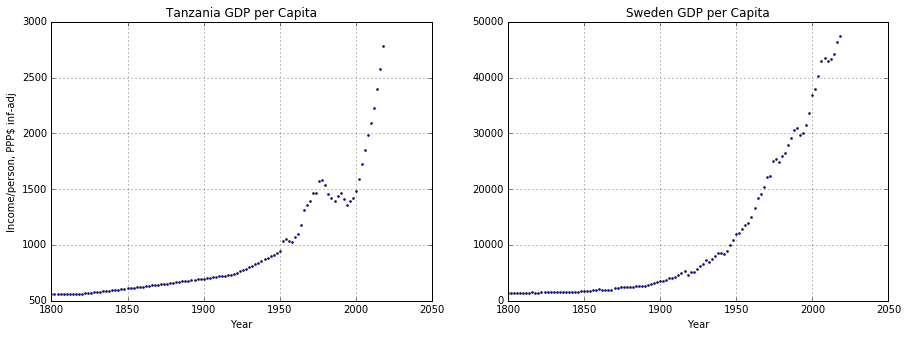

In [41]:
# side-by-side 1d visualization of gdp: tanzania, sweden

# data
Y_Tz = df_Tz['gdp_per_cap']
Y_Sw = df_Sw['gdp_per_cap']
x = df_Tz['year']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x, Y_Tz, 'bo', markersize=2)
ax1.grid()
ax1.set_xlabel('Year');
ax1.set_ylabel('Income/person, PPP$ inf-adj')
ax1.set_title('Tanzania GDP per Capita')

ax2.plot(x, Y_Sw, 'bo', markersize=2)
ax2.grid()
ax2.set_xlabel('Year');
ax2.set_title('Sweden GDP per Capita')

plt.subplots_adjust(wspace=0.2);

# save as png
#plt.savefig('plots/Tz-Sw-gdp.png', bbox_inches='tight')


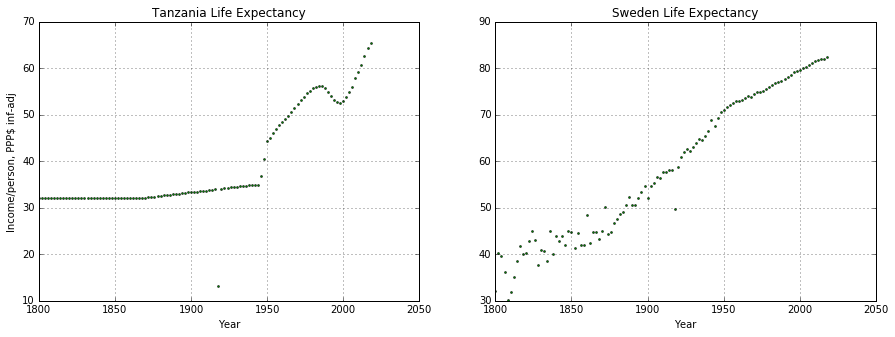

In [42]:
# side-by-side 1d visualization of life expectancy: tanzania, sweden

# data
Y_Tz = df_Tz['life_expec']
Y_Sw = df_Sw['life_expec']
x = df_Tz['year']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x, Y_Tz, 'go', markersize=2)
ax1.grid()
ax1.set_xlabel('Year');
ax1.set_ylabel('Income/person, PPP$ inf-adj')
ax1.set_title('Tanzania Life Expectancy')

ax2.plot(x, Y_Sw, 'go', markersize=2)
ax2.grid()
ax2.set_xlabel('Year');
ax2.set_title('Sweden Life Expectancy')

plt.subplots_adjust(wspace=0.2);

# save as png
plt.savefig('plots/1-Tz-Sw-life.png', bbox_inches='tight')


<a id='Q1'></a>
## Q1. How have income and health indicators changed since 1800?
* filter countries by regional group: Asia, Africa, Americas, Europe
* calculate yearly averages for regional health metrics
* plot average change

### Countries by Geographic Region

In [43]:
df_asia = df_gapminder.query('region == "asia"')
df_africa = df_gapminder.query('region == "africa"')
df_americas = df_gapminder.query('region == "americas"')
df_europe = df_gapminder.query('region == "europe"')

### Asia

In [44]:
# first few rows
df_asia.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Afghanistan,asia,1800,603,28.2,469.0,7.00
7,Australia,asia,1800,814,34.0,391.0,6.50
11,Bahrain,asia,1800,1240,30.3,440.0,7.03
12,Bangladesh,asia,1800,876,25.5,508.0,6.70
18,Bhutan,asia,1800,629,28.8,463.0,6.67


In [45]:
# groupby regional health metrics by year
df_As_by_year = df_asia.groupby('year')
#df_As_by_year

# inspect statistics for annual health metrics, first few rows
#df_As_by_year.describe().head()

In [46]:
# gdp/capita
avg_gdp = list(df_As_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average Asian GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_As_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average Asian life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_As_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average Asian child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_As_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average Asian Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average Asian GDP per capita,
 1800: 859
 2018: 20161 
Average Asian life expectancy at birth,
 1800: 29
 2018: 73 
Average Asian child mortality rate (per 1000 births),
 1800: 445
 2018: 23 
Average Asian Fertility Rate,
 1800: 6
 2018: 3 


### Plot Change in Health Metrics

In [47]:
# groupby Asian health metrics by year
df_As_by_year = df_asia.groupby('year')

# apply mean to year grouping
df_As_mean_by_year = df_As_by_year.mean()

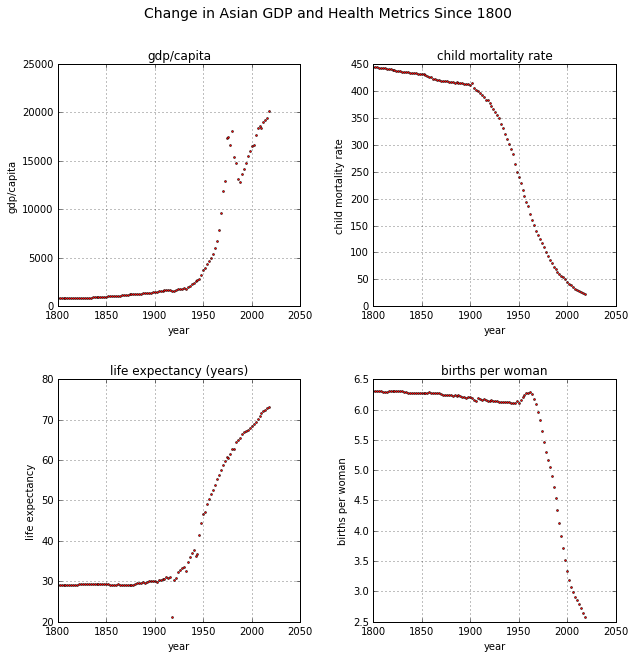

In [48]:
# asian gdp and health metrics over time

# data
Y_As_gdp = df_As_mean_by_year['gdp_per_cap']
Y_As_life = df_As_mean_by_year['life_expec']
Y_As_child = df_As_mean_by_year['child_mortality']
Y_As_birth = df_As_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_As_gdp.index, Y_As_gdp, 'ro', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_As_life.index, Y_As_life, 'ro', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_As_child.index, Y_As_child, 'ro', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality rate')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_As_birth.index, Y_As_birth, 'ro', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in Asian GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);



### Africa

In [49]:
# first few rows
df_africa.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
2,Algeria,africa,1800,715,28.8,460.0,6.99
3,Angola,africa,1800,618,27.0,486.0,6.93
17,Benin,africa,1800,597,31.0,430.0,5.55
21,Botswana,africa,1800,397,33.6,397.0,6.47
25,Burkina Faso,africa,1800,480,29.2,455.0,6.03


### African GDP Per Capita

In [50]:
# 1800 vs 2018
af_1800 = df_africa[df_africa['year'] == 1800].reset_index(drop=True)
af_2018 = df_africa[df_africa['year'] == 2018].reset_index(drop=True)
af_2018.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Algeria,africa,2018,13700,77.9,23.1,2.64
1,Angola,africa,2018,5850,65.2,81.6,5.55
2,Benin,africa,2018,2170,65.0,94.7,4.84
3,Botswana,africa,2018,16500,66.9,36.6,2.64
4,Burkina Faso,africa,2018,1710,61.6,80.4,5.19


In [51]:
# summary statistics
af_1800.describe()

,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
count,54.0,54.000000,54.000000,54.000000,54.000000
mean,1800.0,626.759259,30.525926,439.092593,6.397778
std,0.0,205.900226,2.455966,31.081311,0.517084
min,1800.0,350.000000,25.100000,395.000000,5.030000
25%,1800.0,481.250000,29.250000,416.250000,6.060000
50%,1800.0,586.000000,30.850000,434.500000,6.485000
75%,1800.0,747.500000,32.175000,451.750000,6.780000
max,1800.0,1480.000000,37.000000,514.000000,7.250000


In [52]:
# summary statistics
af_2018.describe()

,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
count,54.0,54.000000,54.000000,54.000000,54.000000
mean,2018.0,5478.888889,65.235185,62.088889,4.178519
std,0.0,6246.761696,5.746440,28.985537,1.198219
min,2018.0,629.000000,51.100000,12.200000,1.430000
25%,2018.0,1505.000000,61.200000,42.450000,3.377500
50%,2018.0,2870.000000,65.100000,60.800000,4.425000
75%,2018.0,6277.500000,67.675000,83.475000,4.862500
max,2018.0,27500.000000,78.000000,126.000000,7.130000


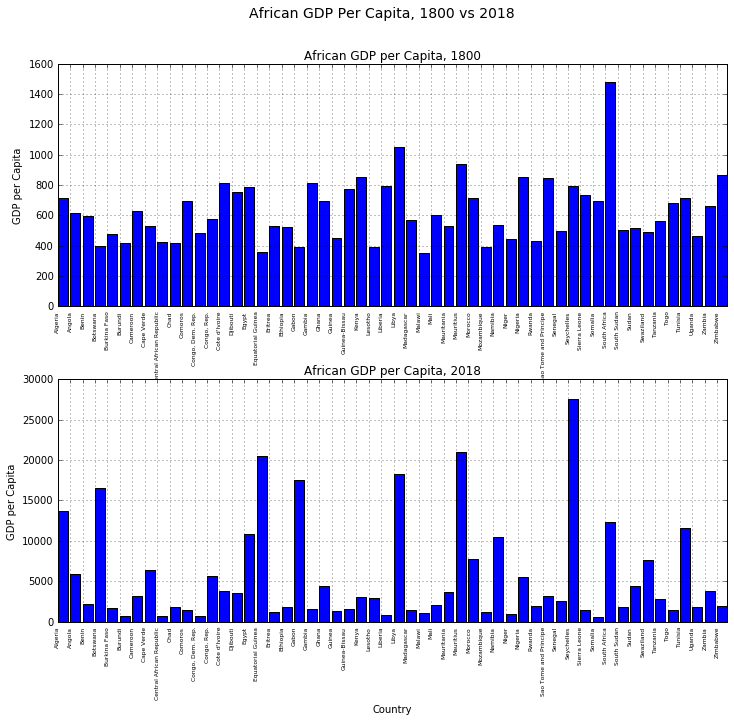

In [53]:
# chart data
gdp_1800_af = af_1800['gdp_per_cap'].tolist()
gdp_2018_af = af_2018['gdp_per_cap'].tolist()

# x-axis
c_label = af_1800.country.tolist()
c_pos = [i for i, _ in enumerate(c_label)]

# bar plot
fig = plt.figure(figsize=(12,10))
axs = fig.subplots(2, 1) # , sharex=True

axs[0].bar(c_label, gdp_1800_af)
axs[0].set_title("African GDP per Capita, 1800" )
axs[0].set_ylabel('GDP per Capita')
#axs[0].set_xlabel('Country') 
axs[0].set_xticklabels(c_label, rotation=90, size=6)

axs[0].grid(True)

axs[1].bar(c_label, gdp_2018_af)
axs[1].set_title("African GDP per Capita, 2018" )
axs[1].set_ylabel('GDP per Capita')
axs[1].set_xlabel('Country')
axs[1].set_xticklabels(c_label, rotation=90, size=6)

axs[1].grid(True)

fig.suptitle('African GDP Per Capita, 1800 vs 2018', fontsize=14)
plt.subplots_adjust(hspace=0.3, wspace=0.3);
plt.show()

# save as png
fig.savefig('plots/2-af-gdp-00-18.png', bbox_inches='tight')

In [54]:
# groupby Asian health metrics by year
df_Af_by_year = df_africa.groupby('year')

# apply mean to year grouping
df_Af_mean_by_year = df_Af_by_year.mean()

In [55]:
# gdp/capita
avg_gdp = list(df_Af_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average African GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_Af_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average African life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_Af_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average African child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_Af_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average African Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))



Average African GDP per capita,
 1800: 627
 2018: 5479 
Average African life expectancy at birth,
 1800: 31
 2018: 65 
Average African child mortality rate (per 1000 births),
 1800: 439
 2018: 62 
Average African Fertility Rate,
 1800: 6
 2018: 4 


### Plot Change in Health Metrics

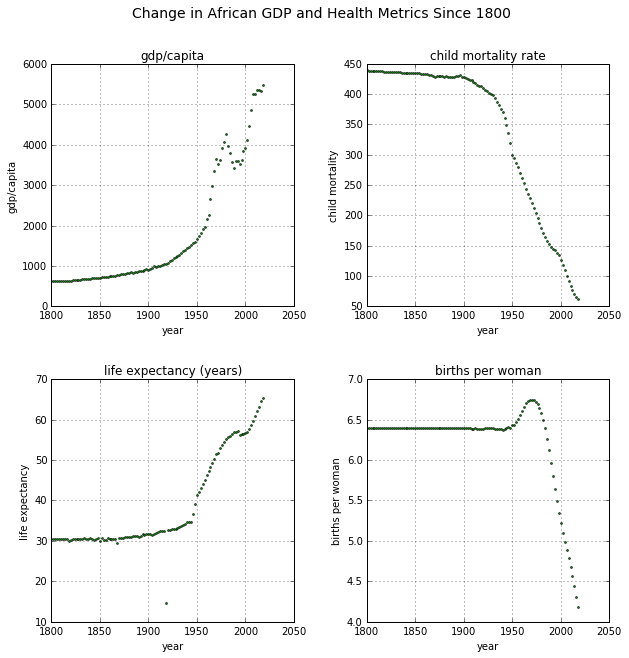

In [56]:
# african gdp and health metrics over time

# graph data - Average Asian health metric over time
Y_Af_gdp = df_Af_mean_by_year['gdp_per_cap']
Y_Af_life = df_Af_mean_by_year['life_expec']
Y_Af_child = df_Af_mean_by_year['child_mortality']
Y_Af_birth = df_Af_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_Af_gdp.index, Y_Af_gdp, 'go', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_Af_life.index, Y_Af_life, 'go', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_Af_child.index, Y_Af_child, 'go', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_Af_birth.index, Y_Af_birth, 'go', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in African GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

# save as png
plt.savefig('plots/1-af-change-metrics.png', bbox_inches='tight')

### Americas

In [57]:
# first few rows
df_americas.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
4,Antigua and Barbuda,americas,1800,757,33.5,474.0,5.00
5,Argentina,americas,1800,1510,33.2,402.0,6.80
10,Bahamas,americas,1800,1450,35.2,471.0,5.90
13,Barbados,americas,1800,913,32.1,470.0,4.96
16,Belize,americas,1800,579,26.5,467.0,6.69


In [58]:
# groupby Americas health metrics by year
df_Am_by_year = df_americas.groupby('year')

# apply mean to year grouping
df_Am_mean_by_year = df_Am_by_year.mean()

In [59]:
# gdp/capita
avg_gdp = list(df_Am_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average Americas GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_Am_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average American life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_Am_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average American child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_Am_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average American Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average Americas GDP per capita,
 1800: 1036
 2018: 15925 
Average American life expectancy at birth,
 1800: 32
 2018: 76 
Average American child mortality rate (per 1000 births),
 1800: 429
 2018: 17 
Average American Fertility Rate,
 1800: 6
 2018: 2 


### Plot Change in Health Metrics

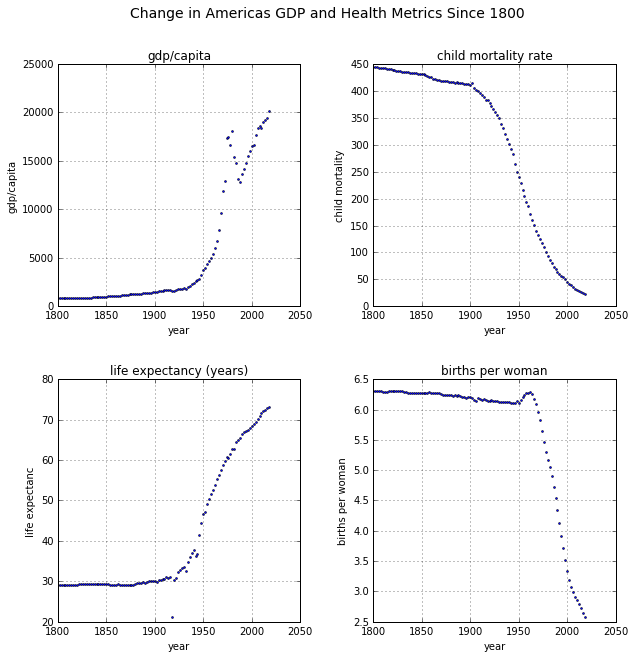

In [60]:
# americas gdp and health metrics over time

# data
Y_Am_gdp = df_Am_mean_by_year['gdp_per_cap']
Y_Am_life = df_Am_mean_by_year['life_expec']
Y_Am_child = df_Am_mean_by_year['child_mortality']
Y_Am_birth = df_Am_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_Am_gdp.index, Y_As_gdp, 'bo', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_Am_life.index, Y_As_life, 'bo', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectanc')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_Am_child.index, Y_As_child, 'bo', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_Am_birth.index, Y_As_birth, 'bo', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in Americas GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

### Europe

In [61]:
# first few rows
df_europe.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
1,Albania,europe,1800,667,35.4,375.0,4.6
6,Armenia,europe,1800,514,34.0,371.0,7.8
8,Austria,europe,1800,1850,34.4,387.0,5.1
9,Azerbaijan,europe,1800,775,29.2,384.0,8.1
14,Belarus,europe,1800,608,36.2,366.0,7.0


In [62]:
# 1800 vs 2018
eu_1800 = df_europe[df_europe['year'] == 1800].reset_index(drop=True)
eu_2018 = df_europe[df_europe['year'] == 2018].reset_index(drop=True)
eu_2018.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Albania,europe,2018,12400,78.0,12.90,1.71
1,Armenia,europe,2018,8660,76.0,12.90,1.60
2,Austria,europe,2018,44600,81.8,2.89,1.52
3,Azerbaijan,europe,2018,16600,72.3,30.30,2.04
4,Belarus,europe,2018,17200,73.8,3.72,1.72


In [63]:
# summary statistics
eu_1800.describe()

,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
count,44.0,44.000000,44.000000,44.000000,44.000000
mean,1800.0,1371.227273,35.288636,379.204545,5.565909
std,0.0,748.834501,3.157878,34.138282,1.032685
min,1800.0,514.000000,28.700000,322.000000,4.040000
25%,1800.0,806.500000,34.000000,361.000000,4.910000
50%,1800.0,1260.000000,35.850000,373.500000,5.365000
75%,1800.0,1550.000000,36.675000,397.000000,5.962500
max,1800.0,4230.000000,42.900000,460.000000,8.100000


In [64]:
# summary statistics
eu_2018.describe()

,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
count,43.0,43.000000,43.000000,43.000000,43.000000
mean,2018.0,31974.883721,78.706977,5.860465,1.629535
std,0.0,18227.259984,3.581194,5.094217,0.218599
min,2018.0,5330.000000,71.100000,1.950000,1.230000
25%,2018.0,18050.000000,75.700000,2.905000,1.480000
50%,2018.0,29500.000000,79.600000,3.860000,1.600000
75%,2018.0,41550.000000,81.800000,6.825000,1.770000
max,2018.0,99000.000000,83.500000,30.300000,2.040000


In [65]:
# chart data
gdp_1800_eu = eu_1800['gdp_per_cap'].tolist()
gdp_2018_eu = eu_2018['gdp_per_cap'].tolist()

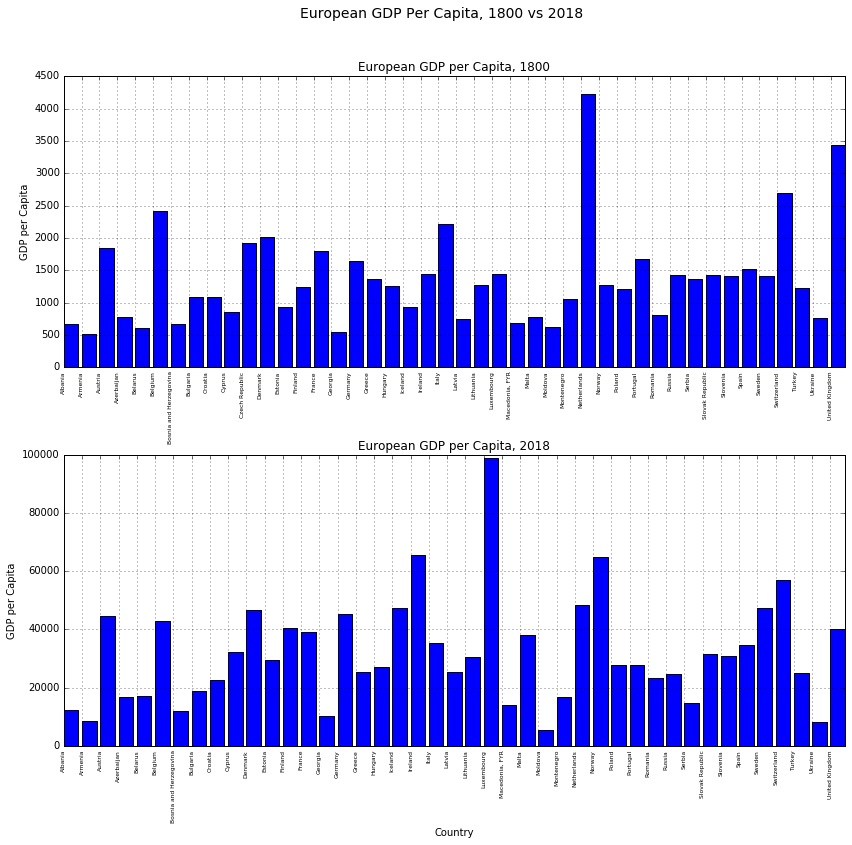

<Figure size 432x288 with 0 Axes>

In [66]:
# chart data
gdp_1800_eu = eu_1800['gdp_per_cap'].tolist()
gdp_2018_eu = eu_2018['gdp_per_cap'].tolist()

# x-axis
c_label_00 = eu_1800.country.tolist()
c_label_18 = eu_2018.country.tolist()

c_pos_eu = [i for i, _ in enumerate(c_label)]

# bar plot
fig = plt.figure(figsize=(14,12))
axs = fig.subplots(2, 1) # , sharex=True

axs[0].bar(c_label_00, gdp_1800_eu)
axs[0].set_title("European GDP per Capita, 1800" )
axs[0].set_ylabel('GDP per Capita')
#axs[0].set_xlabel('Country') 
axs[0].set_xticklabels(c_label_00, rotation=90, size=6)

axs[0].grid(True)

axs[1].bar(c_label_18, gdp_2018_eu)
axs[1].set_title("European GDP per Capita, 2018" )
axs[1].set_ylabel('GDP per Capita')
axs[1].set_xlabel('Country')
axs[1].set_xticklabels(c_label_18, rotation=90, size=6)

axs[1].grid(True)

fig.suptitle('European GDP Per Capita, 1800 vs 2018', fontsize=14)
plt.subplots_adjust(hspace=0.3, wspace=0.3);
plt.show()

# save as png
plt.savefig('plots/5-eu-gdp-00-18.png', bbox_inches='tight')

In [67]:
# groupby European health metrics by year
df_Eu_by_year = df_europe.groupby('year')

# apply mean to year grouping
df_Eu_mean_by_year = df_Eu_by_year.mean()

In [68]:
# gdp/capita
avg_gdp = list(df_Eu_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average European GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_Eu_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average European life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_Eu_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average European child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_Eu_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average European Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average European GDP per capita,
 1800: 1371
 2018: 31975 
Average European life expectancy at birth,
 1800: 35
 2018: 79 
Average European child mortality rate (per 1000 births),
 1800: 379
 2018: 6 
Average European Fertility Rate,
 1800: 6
 2018: 2 


### Plot Change in Health Metrics

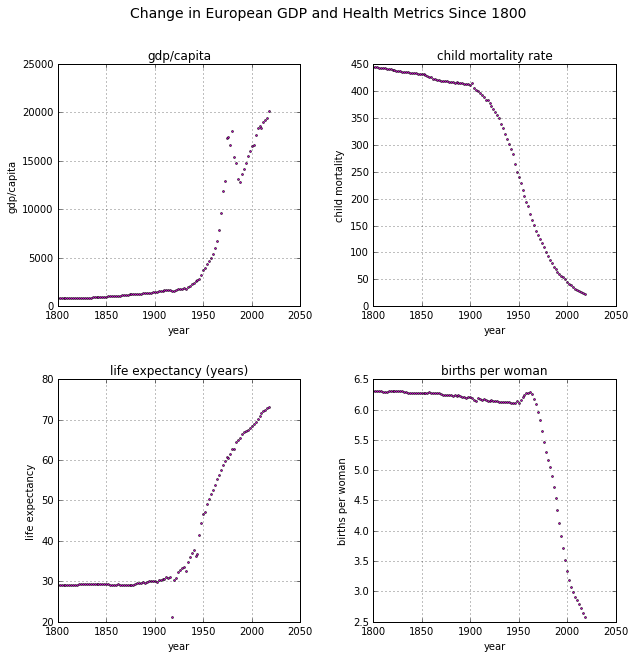

In [69]:
# americas gdp and health metrics over time

# data
Y_Eu_gdp = df_Eu_mean_by_year['gdp_per_cap']
Y_Eu_life = df_Eu_mean_by_year['life_expec']
Y_Eu_child = df_Eu_mean_by_year['child_mortality']
Y_Eu_birth = df_Eu_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_Eu_gdp.index, Y_As_gdp, 'mo', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_Eu_life.index, Y_As_life, 'mo', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_Eu_child.index, Y_As_child, 'mo', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_Eu_birth.index, Y_As_birth, 'mo', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in European GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

# save as png
fig.savefig('plots/6-eu-change-metrics.png', bbox_inches='tight')

### Interpretation of Health Metrics Graphs
* Birth Rates in all regions of the world have fallen as GDP has increased.

<a id='Q2'></a>
## Q2. Are there trends between GDP and indicators of health outcomes? Tanzania and Sweden are compared.
Correlation is used to describe the linear relationship between two continuous variables. Correlation measures the strength 
(qualitatively) and direction of the linear relationship between two or more variables.

* calculate correlation between GDP per Capita and health indicators for Tanzania and Sweden
* plot GDP per Capita versus Life Expectancy, Child Mortality, and Fertility for Tanzania and Sweden


In [70]:
# query country data 
df_Tz = df_gapminder.query('country == "Tanzania"')

df_Sw = df_gapminder.query('country == "Sweden"')

In [71]:
# show correlation table for Tanzania data
corr_Tz = df_Tz.corr()
corr_Tz

,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
year,1.000000,0.847777,0.835500,-0.867606,-0.604034
gdp_per_cap,0.847777,1.000000,0.933754,-0.957181,-0.841535
life_expec,0.835500,0.933754,1.000000,-0.968879,-0.707526
child_mortality,-0.867606,-0.957181,-0.968879,1.000000,0.780269
fertility_rate,-0.604034,-0.841535,-0.707526,0.780269,1.000000


In [72]:
corr_Tz['gdp_per_cap']

year               0.847777
gdp_per_cap        1.000000
life_expec         0.933754
child_mortality   -0.957181
fertility_rate    -0.841535
Name: gdp_per_cap, dtype: float64

In [73]:
# Tanzania
corr_Tz = df_Tz.corr()

gdp_life_Tz = round(corr_Tz['gdp_per_cap']['life_expec'],2)
gdp_cmr_Tz = round(corr_Tz['gdp_per_cap']['child_mortality'],2)
gdp_fert_Tz = round(corr_Tz['gdp_per_cap']['fertility_rate'],2)

print("Correlation between Tanzania GDP and Health Indicators\n\
      GDP-Life Expectancy: {} \n\
      GDP-Child Mortality: {} \n\
      GDP-Fertility: {} ".format(gdp_life_Tz, gdp_cmr_Tz, gdp_fert_Tz))

Correlation between Tanzania GDP and Health Indicators
      GDP-Life Expectancy: 0.93 
      GDP-Child Mortality: -0.96 
      GDP-Fertility: -0.84 


In [74]:
# Sweden
corr_Sw = df_Sw.corr()

gdp_life_Sw = round(corr_Sw['gdp_per_cap']['life_expec'],2)
gdp_cmr_Sw = round(corr_Sw['gdp_per_cap']['child_mortality'],2)
gdp_fert_Sw = round(corr_Sw['gdp_per_cap']['fertility_rate'],2)

print("Correlation between Sweden GDP and Health Indicators\n\
      GDP-Life Expectancy: {} \n\
      GDP-Child Mortality: {} \n\
      GDP-Fertility: {} ".format(gdp_life_Sw, gdp_cmr_Sw, gdp_fert_Sw))

Correlation between Sweden GDP and Health Indicators
      GDP-Life Expectancy: 0.86 
      GDP-Child Mortality: -0.77 
      GDP-Fertility: -0.77 


## Interpretation of Correlation Coefficients
A correlation can range between -1 and 1. Values greater than zero mean two variables are positively correlated, as X increases, Y also increases. For values below zero, two variables are negatively correlated, as X increases, Y decreases. Correlations for both Tanzania and Sweden show:

* GDP and Life Expectancy are strongly positively correlated.
* GDP and Child Mortality are strongly negatively correlated.
* GDP and Fertility are strongly negatively correlated.

__Correlation does not imply causality.__  We can not conclude that changes in GDP causes the change in health metrics. More sophisticated statistical analysis is required for such a conclusion.

### 2D health metrics plot: correlation

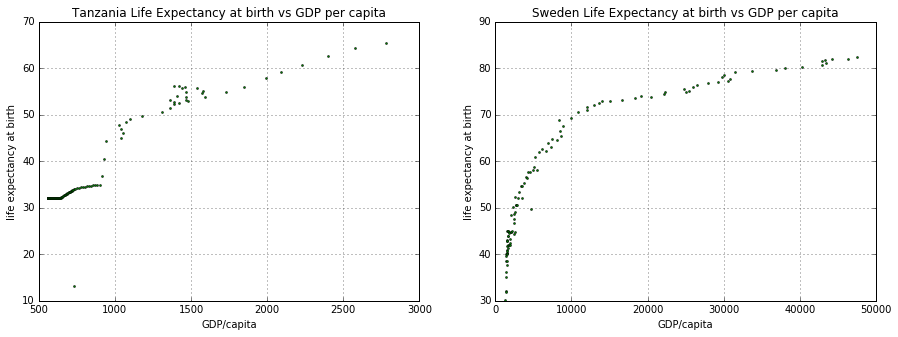

In [75]:
# gdp and life expectancy 
# afgahnistan, sweden

# data
Y_Tz = df_Tz['life_expec']
Y_Sw = df_Sw['life_expec']
x_Tz = df_Tz['gdp_per_cap']
x_Sw = df_Sw['gdp_per_cap']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x_Tz, Y_Tz, 'go', markersize=2)
ax1.grid()
ax1.set_xlabel('GDP/capita');
ax1.set_ylabel('life expectancy at birth');
ax1.set_title('Tanzania Life Expectancy at birth vs GDP per capita');

ax2.plot(x_Sw, Y_Sw, 'go', markersize=2)
ax2.grid()
ax2.set_xlabel('GDP/capita');
ax2.set_ylabel('life expectancy at birth');
ax2.set_title('Sweden Life Expectancy at birth vs GDP per capita')

plt.subplots_adjust(wspace=0.2);

# save as png
plt.savefig('plots/7-Tz-Sw-life-v-gdp.png', bbox_inches='tight')

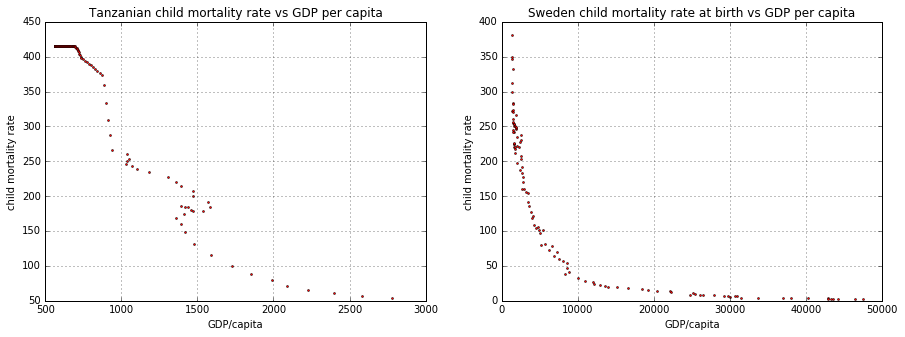

In [76]:
# gdp and child mortality 
# afgahnistan, sweden

# data
Y_Tz = df_Tz['child_mortality']
Y_Sw = df_Sw['child_mortality']
x_Tz = df_Tz['gdp_per_cap']
x_Sw = df_Sw['gdp_per_cap']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x_Tz, Y_Tz, 'ro', markersize=2)
ax1.grid()
ax1.set_xlabel('GDP/capita');
ax1.set_ylabel('child mortality rate');
ax1.set_title('Tanzanian child mortality rate vs GDP per capita');

ax2.plot(x_Sw, Y_Sw, 'ro', markersize=2)
ax2.grid()
ax2.set_xlabel('GDP/capita');
ax2.set_ylabel('child mortality rate');
ax2.set_title('Sweden child mortality rate at birth vs GDP per capita')

plt.subplots_adjust(wspace=0.2);

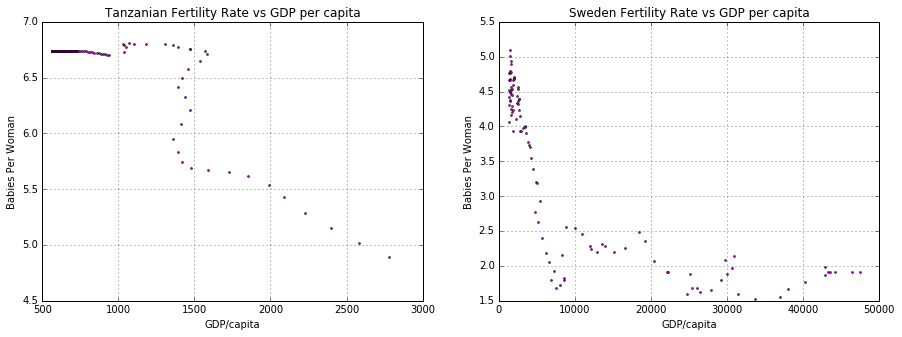

In [77]:
# gdp and babies per woman 
# afgahnistan, sweden

# data
Y_Tz = df_Tz['fertility_rate']
Y_Sw = df_Sw['fertility_rate']
x_Tz = df_Tz['gdp_per_cap']
x_Sw = df_Sw['gdp_per_cap']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x_Tz, Y_Tz, 'mo', markersize=2)
ax1.grid()
ax1.set_xlabel('GDP/capita');
ax1.set_ylabel('Babies Per Woman');
ax1.set_title('Tanzanian Fertility Rate vs GDP per capita');

ax2.plot(x_Sw, Y_Sw, 'mo', markersize=2)
ax2.grid()
ax2.set_xlabel('GDP/capita');
ax2.set_ylabel('Babies Per Woman'); 
ax2.set_title('Sweden Fertility Rate vs GDP per capita')

plt.subplots_adjust(wspace=0.2);

<a id='Q3'></a>
## Q3. How has the number of children born per woman changed since 1800?
* Plot change in Fertility Rates for Asian, Africa, Americas, and Europe

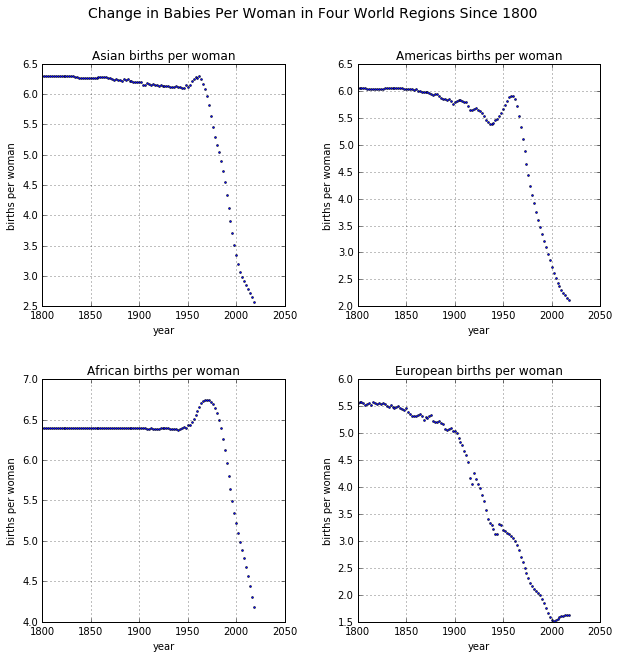

In [78]:
# Change in Fertility Rate over time in different world regions

# data
Y_As_birth = df_As_mean_by_year['fertility_rate']
Y_Af_birth = df_Af_mean_by_year['fertility_rate']
Y_Am_birth = df_Am_mean_by_year['fertility_rate']
Y_Eu_birth = df_Eu_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_As_birth.index, Y_As_birth, 'bo', markersize=2)
axs[0, 0].set_title('Asian births per woman')
axs[0, 0].set_ylabel('births per woman')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()
   
axs[1, 0].plot(Y_Af_birth.index, Y_Af_birth, 'bo', markersize=2)
axs[1, 0].set_title('African births per woman')
axs[1, 0].set_ylabel('births per woman')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()
   
axs[0, 1].plot(Y_Am_birth.index, Y_Am_birth, 'bo', markersize=2)
axs[0, 1].set_title('Americas births per woman')
axs[0, 1].set_ylabel('births per woman')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()
   
axs[1, 1].plot(Y_Eu_birth.index, Y_Eu_birth, 'bo', markersize=2)
axs[1, 1].set_title('European births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()
   
fig.suptitle('Change in Babies Per Woman in Four World Regions Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

# save as png
plt.savefig('plots/8-change-babies.png', bbox_inches='tight')

### Interpretation of Fertility Graphs
* Birth Rates in all regions of the world have fallen since the 1950s
* Birth rates in Europe began falling much earlier than other regions of the world

### Call submit process

## Gapminder Data Exploration and Analysis

In [79]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

#### Gapminder Health Metrics Data

In [80]:
# load data
df_gapminder = pd.read_csv('gapminder-data/df_gapminder.csv')
df_gapminder.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Afghanistan,asia,1800,603,28.2,469.0,7.00
1,Albania,europe,1800,667,35.4,375.0,4.60
2,Algeria,africa,1800,715,28.8,460.0,6.99
3,Angola,africa,1800,618,27.0,486.0,6.93
4,Antigua and Barbuda,americas,1800,757,33.5,474.0,5.00


In [81]:
# query individual country data 
df_Tz = df_gapminder.query('country == "Tanzania"')
df_Tz.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
162,Tanzania,africa,1800,562,32.2,415.0,6.74
346,Tanzania,africa,1802,562,32.2,415.0,6.74
530,Tanzania,africa,1804,562,32.2,415.0,6.74
714,Tanzania,africa,1806,563,32.2,415.0,6.74
898,Tanzania,africa,1808,563,32.2,415.0,6.74


In [82]:
# query individual country data
df_Sw = df_gapminder.query('country == "Sweden"' )
df_Sw.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
158,Sweden,europe,1800,1410,32.2,381.0,4.07
342,Sweden,europe,1802,1470,40.2,283.0,4.50
526,Sweden,europe,1804,1360,39.7,272.0,4.52
710,Sweden,europe,1806,1460,36.2,333.0,4.36
894,Sweden,europe,1808,1330,30.1,350.0,4.31


### Initial Visualization: gdp and health metrics for individual countries
* 1d metric subplot
* 2d metric subplot

### Initial Data Visualization: plot 1d health metrics for individual countries

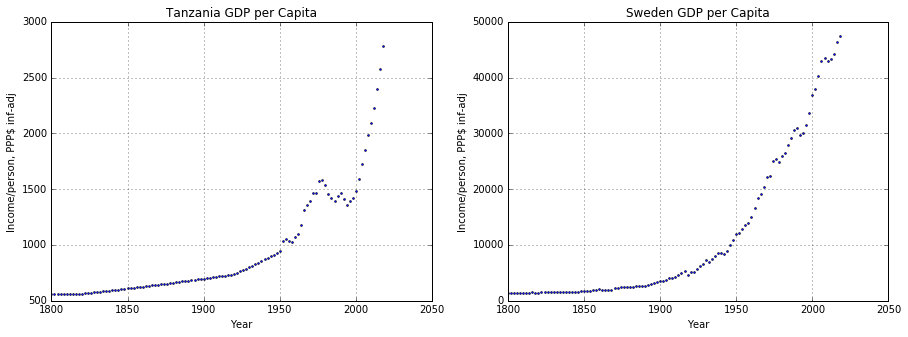

In [83]:
# side-by-side 1d visualization of gdp: tanzania, sweden

# data
Y_Tz = df_Tz['gdp_per_cap']
Y_Sw = df_Sw['gdp_per_cap']
x = df_Tz['year']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x, Y_Tz, 'bo', markersize=2)
ax1.grid()
ax1.set_xlabel('Year');
ax1.set_ylabel('Income/person, PPP$ inf-adj')
ax1.set_title('Tanzania GDP per Capita')

ax2.plot(x, Y_Sw, 'bo', markersize=2)
ax2.grid()
ax2.set_xlabel('Year');
ax2.set_ylabel('Income/person, PPP$ inf-adj')
ax2.set_title('Sweden GDP per Capita')

plt.subplots_adjust(wspace=0.2);

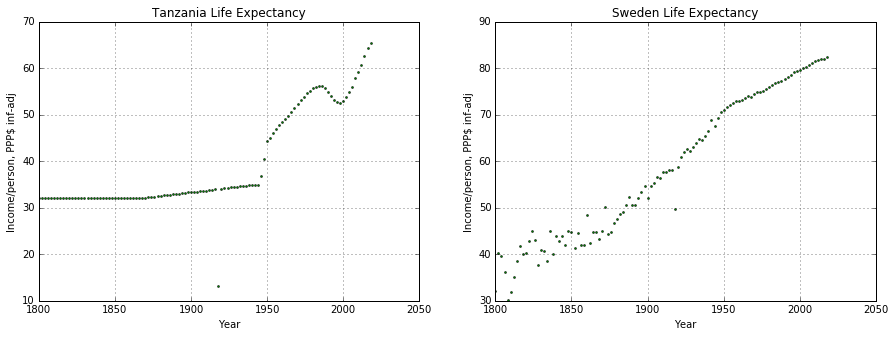

In [84]:
# side-by-side 1d visualization of life expectancy: tanzania, sweden

# data
Y_Tz = df_Tz['life_expec']
Y_Sw = df_Sw['life_expec']
x = df_Tz['year']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x, Y_Tz, 'go', markersize=2)
ax1.grid()
ax1.set_xlabel('Year');
ax1.set_ylabel('Income/person, PPP$ inf-adj')
ax1.set_title('Tanzania Life Expectancy')

ax2.plot(x, Y_Sw, 'go', markersize=2)
ax2.grid()
ax2.set_xlabel('Year');
ax2.set_ylabel('Income/person, PPP$ inf-adj')
ax2.set_title('Sweden Life Expectancy')

plt.subplots_adjust(wspace=0.2);

## Q1. How have income and health indicators changed since 1800?
* filter countries by regional group: Asia, Africa, Americas, Europe
* calculate yearly averages for regional health metrics
* plot average change

### Countries by Geographic Region

In [85]:
df_asia = df_gapminder.query('region == "asia"')
df_africa = df_gapminder.query('region == "africa"')
df_americas = df_gapminder.query('region == "americas"')
df_europe = df_gapminder.query('region == "europe"')

### Asia

In [86]:
# first few rows
df_asia.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
0,Afghanistan,asia,1800,603,28.2,469.0,7.00
7,Australia,asia,1800,814,34.0,391.0,6.50
11,Bahrain,asia,1800,1240,30.3,440.0,7.03
12,Bangladesh,asia,1800,876,25.5,508.0,6.70
18,Bhutan,asia,1800,629,28.8,463.0,6.67


In [87]:
# groupby regional health metrics by year
df_As_by_year = df_asia.groupby('year')
#df_As_by_year

# inspect statistics for annual health metrics, first few rows
#df_As_by_year.describe().head()

In [88]:
# gdp/capita
avg_gdp = list(df_As_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average Asian GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_As_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average Asian life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_As_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average Asian child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_As_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average Asian Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average Asian GDP per capita,
 1800: 859
 2018: 20161 
Average Asian life expectancy at birth,
 1800: 29
 2018: 73 
Average Asian child mortality rate (per 1000 births),
 1800: 445
 2018: 23 
Average Asian Fertility Rate,
 1800: 6
 2018: 3 


### Plot Change in Health Metrics

In [89]:
# groupby Asian health metrics by year
df_As_by_year = df_asia.groupby('year')

# apply mean to year grouping
df_As_mean_by_year = df_As_by_year.mean()

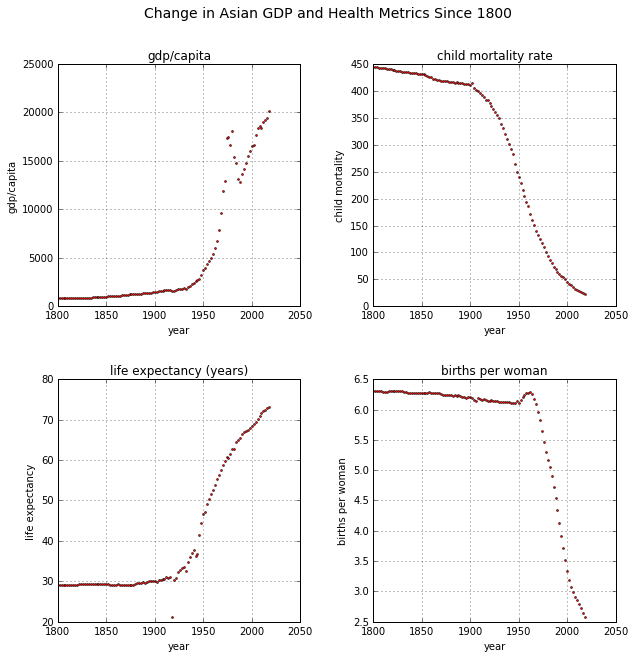

In [90]:
# asian gdp and health metrics over time

# data
Y_As_gdp = df_As_mean_by_year['gdp_per_cap']
Y_As_life = df_As_mean_by_year['life_expec']
Y_As_child = df_As_mean_by_year['child_mortality']
Y_As_birth = df_As_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_As_gdp.index, Y_As_gdp, 'ro', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_As_life.index, Y_As_life, 'ro', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_As_child.index, Y_As_child, 'ro', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_As_birth.index, Y_As_birth, 'ro', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in Asian GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

### Africa

In [91]:
# first few rows
df_africa.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
2,Algeria,africa,1800,715,28.8,460.0,6.99
3,Angola,africa,1800,618,27.0,486.0,6.93
17,Benin,africa,1800,597,31.0,430.0,5.55
21,Botswana,africa,1800,397,33.6,397.0,6.47
25,Burkina Faso,africa,1800,480,29.2,455.0,6.03


In [92]:
# groupby Asian health metrics by year
df_Af_by_year = df_africa.groupby('year')

# apply mean to year grouping
df_Af_mean_by_year = df_Af_by_year.mean()

In [93]:
# gdp/capita
avg_gdp = list(df_Af_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average African GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_Af_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average African life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_Af_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average African child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_Af_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average African Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average African GDP per capita,
 1800: 627
 2018: 5479 
Average African life expectancy at birth,
 1800: 31
 2018: 65 
Average African child mortality rate (per 1000 births),
 1800: 439
 2018: 62 
Average African Fertility Rate,
 1800: 6
 2018: 4 


### Plot Change in Health Metrics

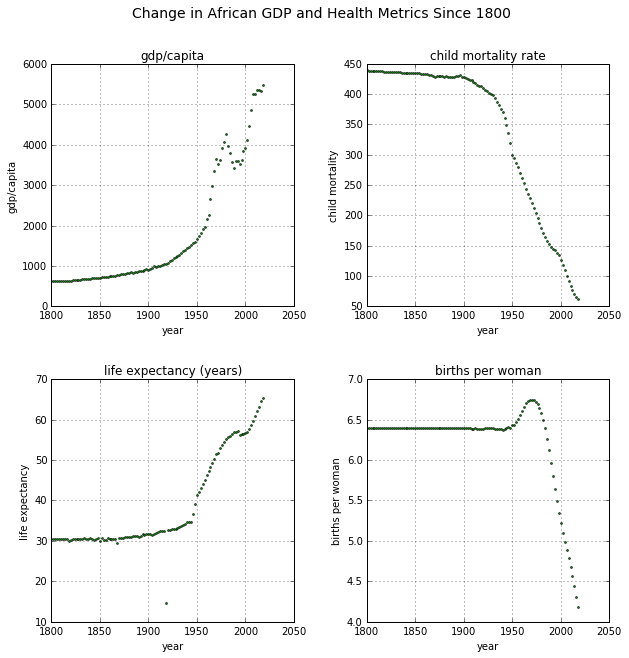

In [94]:
# african gdp and health metrics over time

# graph data - Average Asian health metric over time
Y_Af_gdp = df_Af_mean_by_year['gdp_per_cap']
Y_Af_life = df_Af_mean_by_year['life_expec']
Y_Af_child = df_Af_mean_by_year['child_mortality']
Y_Af_birth = df_Af_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_Af_gdp.index, Y_Af_gdp, 'go', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_Af_life.index, Y_Af_life, 'go', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_Af_child.index, Y_Af_child, 'go', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_Af_birth.index, Y_Af_birth, 'go', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in African GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

### Americas

In [95]:
# first few rows
df_americas.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
4,Antigua and Barbuda,americas,1800,757,33.5,474.0,5.00
5,Argentina,americas,1800,1510,33.2,402.0,6.80
10,Bahamas,americas,1800,1450,35.2,471.0,5.90
13,Barbados,americas,1800,913,32.1,470.0,4.96
16,Belize,americas,1800,579,26.5,467.0,6.69


In [96]:
# groupby Americas health metrics by year
df_Am_by_year = df_americas.groupby('year')

# apply mean to year grouping
df_Am_mean_by_year = df_Am_by_year.mean()

In [97]:
# gdp/capita
avg_gdp = list(df_Am_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average Americas GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_Am_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average American life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_Am_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average American child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_Am_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average American Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average Americas GDP per capita,
 1800: 1036
 2018: 15925 
Average American life expectancy at birth,
 1800: 32
 2018: 76 
Average American child mortality rate (per 1000 births),
 1800: 429
 2018: 17 
Average American Fertility Rate,
 1800: 6
 2018: 2 


### Plot Change in Health Metrics

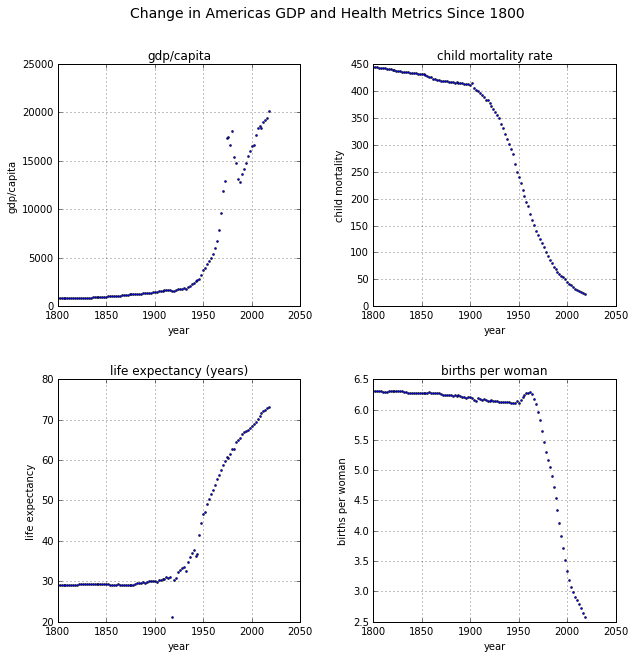

In [98]:
# americas gdp and health metrics over time

# data
Y_Am_gdp = df_Am_mean_by_year['gdp_per_cap']
Y_Am_life = df_Am_mean_by_year['life_expec']
Y_Am_child = df_Am_mean_by_year['child_mortality']
Y_Am_birth = df_Am_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_Am_gdp.index, Y_As_gdp, 'bo', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_Am_life.index, Y_As_life, 'bo', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_Am_child.index, Y_As_child, 'bo', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_Am_birth.index, Y_As_birth, 'bo', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in Americas GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

### Europe

In [99]:
# first few rows
df_europe.head()

,country,region,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
1,Albania,europe,1800,667,35.4,375.0,4.6
6,Armenia,europe,1800,514,34.0,371.0,7.8
8,Austria,europe,1800,1850,34.4,387.0,5.1
9,Azerbaijan,europe,1800,775,29.2,384.0,8.1
14,Belarus,europe,1800,608,36.2,366.0,7.0


In [100]:
# groupby European health metrics by year
df_Eu_by_year = df_europe.groupby('year')

# apply mean to year grouping
df_Eu_mean_by_year = df_Eu_by_year.mean()

In [101]:
# gdp/capita
avg_gdp = list(df_Eu_by_year.describe().gdp_per_cap['mean'])
gdp_1800 = round(avg_gdp[0])
gdp_2018 = round(avg_gdp[-1])

print("Average European GDP per capita,\n 1800: {}\n 2018: {} ".format(gdp_1800, gdp_2018))

# average life expectancy
avg_life = list(df_Eu_by_year.describe().life_expec['mean'])
life_1800 = round(avg_life[0])
life_2018 = round(avg_life[-1])

print("Average European life expectancy at birth,\n 1800: {}\n 2018: {} ".format(life_1800, life_2018))

# average child mortality rate
avg_cmr = list(df_Eu_by_year.describe().child_mortality['mean'])
cmr_1800 = round(avg_cmr[0])
cmr_2018 = round(avg_cmr[-1])

print("Average European child mortality rate (per 1000 births),\n 1800: {}\n 2018: {} ".format(cmr_1800, cmr_2018))

# average fertility rate
avg_fert = list(df_Eu_by_year.describe().fertility_rate['mean'])
fert_1800 = round(avg_fert[0])
fert_2018 = round(avg_fert[-1])

print("Average European Fertility Rate,\n 1800: {}\n 2018: {} ".format(fert_1800, fert_2018))

Average European GDP per capita,
 1800: 1371
 2018: 31975 
Average European life expectancy at birth,
 1800: 35
 2018: 79 
Average European child mortality rate (per 1000 births),
 1800: 379
 2018: 6 
Average European Fertility Rate,
 1800: 6
 2018: 2 


### Plot Change in Health Metrics

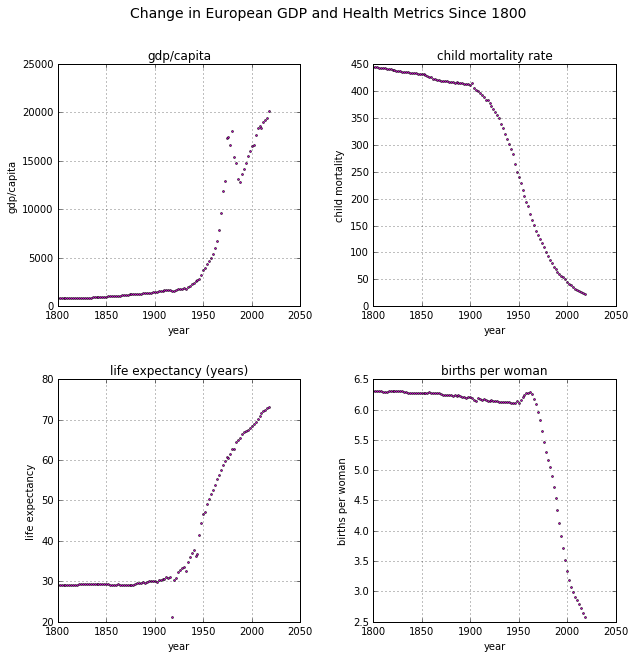

In [102]:
# americas gdp and health metrics over time

# data
Y_Eu_gdp = df_Eu_mean_by_year['gdp_per_cap']
Y_Eu_life = df_Eu_mean_by_year['life_expec']
Y_Eu_child = df_Eu_mean_by_year['child_mortality']
Y_Eu_birth = df_Eu_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(Y_Eu_gdp.index, Y_As_gdp, 'mo', markersize=2)
axs[0, 0].set_title('gdp/capita')
axs[0, 0].set_ylabel('gdp/capita')
axs[0, 0].set_xlabel('year')
axs[0, 0].grid()

axs[1, 0].plot(Y_Eu_life.index, Y_As_life, 'mo', markersize=2)
axs[1, 0].set_title('life expectancy (years)')
axs[1, 0].set_ylabel('life expectancy')
axs[1, 0].set_xlabel('year')
axs[1, 0].grid()

axs[0, 1].plot(Y_Eu_child.index, Y_As_child, 'mo', markersize=2)
axs[0, 1].set_title('child mortality rate')
axs[0, 1].set_ylabel('child mortality')
axs[0, 1].set_xlabel('year')
axs[0, 1].grid()

axs[1, 1].plot(Y_Eu_birth.index, Y_As_birth, 'mo', markersize=2)
axs[1, 1].set_title('births per woman')
axs[1, 1].set_ylabel('births per woman')
axs[1, 1].set_xlabel('year')
axs[1, 1].grid()

fig.suptitle('Change in European GDP and Health Metrics Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

## Interpretation of Q2 Health Metrics Graphs
* While GDP Per Capita has increased since 1800,
    * Child Mortality has fallen
    * Life Expectancy has increased
    * Births Per Woman have fallen

## Q2. Are there trends between GDP and indicators of health outcomes? Use Tanzania and Sweden as examples.
Correlation is used to describe the linear relationship between two continuous variables. Correlation measures the strength 
(qualitatively) and direction of the linear relationship between two or more variables.

* calculate correlation between GDP per Capita and health indicators for Tanzania and Sweden
* plot GDP per Capita versus Life Expectancy, Child Mortality, and Fertility for Tanzania and Sweden


In [103]:
# query country data 
df_Tz = df_gapminder.query('country == "Tanzania"')
df_Sw = df_gapminder.query('country == "Sweden"')

In [104]:
# show correlation table for Tanzania data
corr_Tz = df_Tz.corr()
corr_Tz

,year,gdp_per_cap,life_expec,child_mortality,fertility_rate
year,1.000000,0.847777,0.835500,-0.867606,-0.604034
gdp_per_cap,0.847777,1.000000,0.933754,-0.957181,-0.841535
life_expec,0.835500,0.933754,1.000000,-0.968879,-0.707526
child_mortality,-0.867606,-0.957181,-0.968879,1.000000,0.780269
fertility_rate,-0.604034,-0.841535,-0.707526,0.780269,1.000000


In [105]:
corr_Tz['gdp_per_cap']

year               0.847777
gdp_per_cap        1.000000
life_expec         0.933754
child_mortality   -0.957181
fertility_rate    -0.841535
Name: gdp_per_cap, dtype: float64

In [106]:
# Tanzania
corr_Tz = df_Tz.corr()

gdp_life_Tz = round(corr_Tz['gdp_per_cap']['life_expec'],2)
gdp_cmr_Tz = round(corr_Tz['gdp_per_cap']['child_mortality'],2)
gdp_fert_Tz = round(corr_Tz['gdp_per_cap']['fertility_rate'],2)

print("Correlation between Tanzania GDP and Health Indicators\n\
      GDP-Life Expectancy: {} \n\
      GDP-Child Mortality: {} \n\
      GDP-Fertility: {} ".format(gdp_life_Tz, gdp_cmr_Tz, gdp_fert_Tz))

Correlation between Tanzania GDP and Health Indicators
      GDP-Life Expectancy: 0.93 
      GDP-Child Mortality: -0.96 
      GDP-Fertility: -0.84 


In [107]:
# Sweden
corr_Sw = df_Sw.corr()

gdp_life_Sw = round(corr_Sw['gdp_per_cap']['life_expec'],2)
gdp_cmr_Sw = round(corr_Sw['gdp_per_cap']['child_mortality'],2)
gdp_fert_Sw = round(corr_Sw['gdp_per_cap']['fertility_rate'],2)

print("Correlation between Sweden GDP and Health Indicators\n\
      GDP-Life Expectancy: {} \n\
      GDP-Child Mortality: {} \n\
      GDP-Fertility: {} ".format(gdp_life_Sw, gdp_cmr_Sw, gdp_fert_Sw))

Correlation between Sweden GDP and Health Indicators
      GDP-Life Expectancy: 0.86 
      GDP-Child Mortality: -0.77 
      GDP-Fertility: -0.77 


## Interpretation of Correlation Coefficients
A correlation can range between -1 and 1. Values greater than zero mean two variables are positively correlated, as X increases, Y also increases. For values below zero, two variables are negatively correlated, as X increases, Y decreases. Correlations for both Tanzania and Sweden show:

* GDP and Life Expectancy are strongly positively correlated.
* GDP and Child Mortality are strongly negatively correlated.
* GDP and Fertility are strongly negatively correlated.

__Correlation does not imply causality.__  We can not conclude that changes in GDP causes the change in health metrics. More sophisticated statistical analysis is required for such a conclusion.

### 2D health metrics plot - correlation

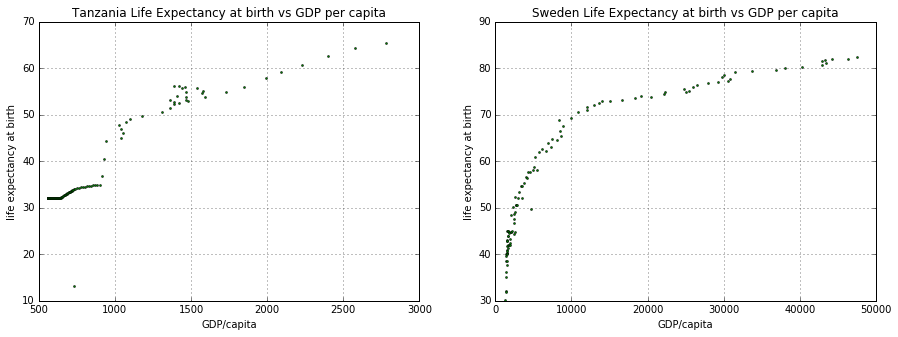

In [108]:
# gdp and life expectancy 
# afgahnistan, sweden

# data
Y_Tz = df_Tz['life_expec']
Y_Sw = df_Sw['life_expec']
x_Tz = df_Tz['gdp_per_cap']
x_Sw = df_Sw['gdp_per_cap']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x_Tz, Y_Tz, 'go', markersize=2)
ax1.grid()
ax1.set_xlabel('GDP/capita');
ax1.set_ylabel('life expectancy at birth');
ax1.set_title('Tanzania Life Expectancy at birth vs GDP per capita');

ax2.plot(x_Sw, Y_Sw, 'go', markersize=2)
ax2.grid()
ax2.set_xlabel('GDP/capita');
ax2.set_ylabel('life expectancy at birth');
ax2.set_title('Sweden Life Expectancy at birth vs GDP per capita')

plt.subplots_adjust(wspace=0.2);

# save plot
fig.savefig('plots/4-Tz-Sw-corr.png', bbox_inches='tight')

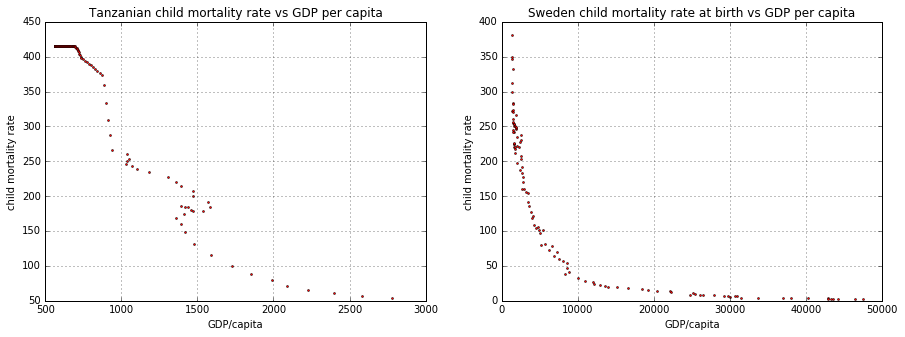

In [109]:
# gdp and child mortality 
# afgahnistan, sweden

# data
Y_Tz = df_Tz['child_mortality']
Y_Sw = df_Sw['child_mortality']
x_Tz = df_Tz['gdp_per_cap']
x_Sw = df_Sw['gdp_per_cap']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x_Tz, Y_Tz, 'ro', markersize=2)
ax1.grid()
ax1.set_xlabel('GDP/capita');
ax1.set_ylabel('child mortality rate');
ax1.set_title('Tanzanian child mortality rate vs GDP per capita');

ax2.plot(x_Sw, Y_Sw, 'ro', markersize=2)
ax2.grid()
ax2.set_xlabel('GDP/capita');
ax2.set_ylabel('child mortality rate');
ax2.set_title('Sweden child mortality rate at birth vs GDP per capita')

plt.subplots_adjust(wspace=0.2);

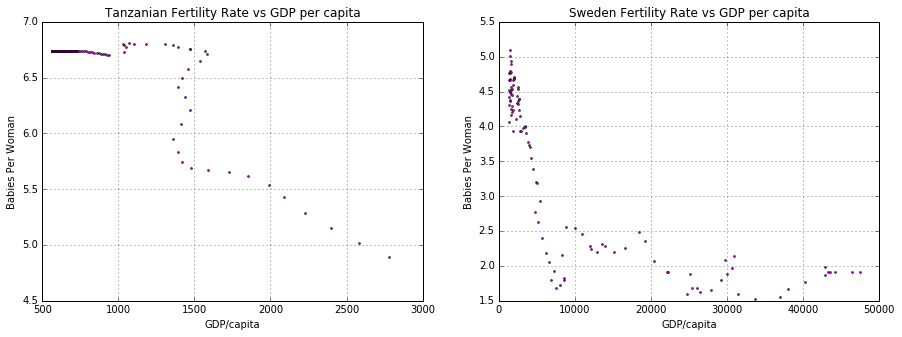

In [110]:
# gdp and babies per woman 
# afgahnistan, sweden

# data
Y_Tz = df_Tz['fertility_rate']
Y_Sw = df_Sw['fertility_rate']
x_Tz = df_Tz['gdp_per_cap']
x_Sw = df_Sw['gdp_per_cap']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.plot(x_Tz, Y_Tz, 'mo', markersize=2)
ax1.grid()
ax1.set_xlabel('GDP/capita');
ax1.set_ylabel('Babies Per Woman');
ax1.set_title('Tanzanian Fertility Rate vs GDP per capita');

ax2.plot(x_Sw, Y_Sw, 'mo', markersize=2)
ax2.grid()
ax2.set_xlabel('GDP/capita');
ax2.set_ylabel('Babies Per Woman');
ax2.set_title('Sweden Fertility Rate vs GDP per capita')

plt.subplots_adjust(wspace=0.2);

## Q3. How did Total Fertility change in different world regions from 1800 and 2018?
* Plot change in Fertility Rates for Asian, Africa, Americas, and Europe

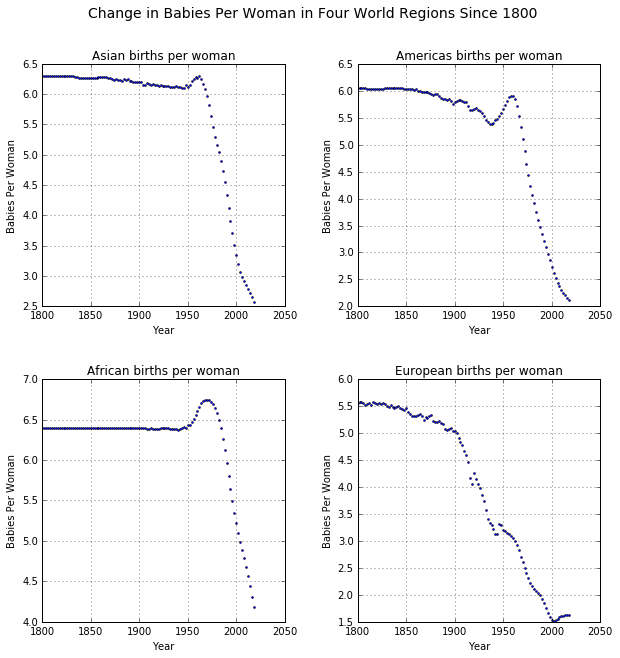

In [111]:
# Change in Fertility Rate over time in different world regions

# data
Y_As_birth = df_As_mean_by_year['fertility_rate']
Y_Af_birth = df_Af_mean_by_year['fertility_rate']
Y_Am_birth = df_Am_mean_by_year['fertility_rate']
Y_Eu_birth = df_Eu_mean_by_year['fertility_rate']

# make figure, subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10 ))

axs[0, 0].plot(Y_As_birth.index, Y_As_birth, 'bo', markersize=2)
axs[0, 0].set_title('Asian births per woman')
axs[0, 0].set_xlabel('Year');
axs[0, 0].set_ylabel('Babies Per Woman');
axs[0, 0].grid()
   
axs[1, 0].plot(Y_Af_birth.index, Y_Af_birth, 'bo', markersize=2)
axs[1, 0].set_title('African births per woman')
axs[1, 0].set_xlabel('Year');
axs[1, 0].set_ylabel('Babies Per Woman');
axs[1, 0].grid()
   
axs[0, 1].plot(Y_Am_birth.index, Y_Am_birth, 'bo', markersize=2)
axs[0, 1].set_title('Americas births per woman')
axs[0, 1].set_xlabel('Year');
axs[0, 1].set_ylabel('Babies Per Woman');
axs[0, 1].grid()
   
axs[1, 1].plot(Y_Eu_birth.index, Y_Eu_birth, 'bo', markersize=2)
axs[1, 1].set_title('European births per woman')
axs[1, 1].set_xlabel('Year');
axs[1, 1].set_ylabel('Babies Per Woman');
axs[1, 1].grid()
   
fig.suptitle('Change in Babies Per Woman in Four World Regions Since 1800', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3);

# save as png
fig.savefig('plots/9-ww-change-babies.png', bbox_inches='tight')

### Interpretation of Fertility Graphs
* Birth Rates in all regions of the world have fallen since the 1950s
* Birth rates in Europe began falling much earlier than other regions of the world

<a id='conclusions'></a>
# Conclusions

This project is explored income and health indicator data from the Gapminder Foundation.

Global income per person has risen far more dramatically in the past half century than at any time during the previous century. However, this income growth has been uneven, with some countries experiencing far higher growth than others.

To investigate how income and indicators of health are related, GDP per capita, life expectancy, child mortality, and the number of children born per woman are explored.

__Data Questions__
1. How have different regions of the world improved measures of health quality since 1800?
2. Are there trends between GDP and indicators of health outcomes? Use Tanzania and Sweden as examples.
3. How did Total Fertility, Babies per Woman, change between 1800 and 2018 in different regions of the world?


__Response to Data Question__

1. Since 1800, life expectancy has risen, and child mortality and fertility have fallen in all regions of the world.
2. The data show the following correlations:
    * GDP and Life Expectancy are strongly positively correlated.
    * GDP and Child Mortality are strongly negatively correlated.
    * GDP and Fertility are strongly negatively correlated.
    
    It is important to note that correlation does not imply causality. It can not be concluded that changes 
    in GDP causes the change in health metrics. More sophisticated statistical analysis is required for such 
    a conclusion.
    
3. Total fertility has fallen all around the world since the 1950s, and Europe has displayed this trend since 
much earlier, around 1850.


### Project submit process

In [112]:
# call the analysis notebook
from subprocess import call
call(['python', '-m', 'nbconvert', 'name-of-notebook.ipynb'])

255